
Noise Addition



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('dwt.csv', header=None, delimiter=',', quotechar='"')
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,-5.0,1.436,1.434,1.441,1.4505,1.45725,4.000000e-03,0.002,-0.007,...,0.82,0.835,0.86,0.8925,0.99125,-3.540000e-17,-0.015,-0.025,-0.0325,-0.09875
1,0,-5.0,1.436,1.434,1.441,1.4505,1.45725,-4.000000e-03,0.002,-0.007,...,0.82,0.835,0.86,0.8925,0.99125,3.540000e-17,-0.015,-0.025,-0.0325,-0.09875
2,0,-5.0,1.432,1.434,1.441,1.4505,1.45725,4.330000e-17,-0.002,-0.007,...,0.85,0.835,0.86,0.8925,0.99125,-1.000000e-02,0.015,-0.025,-0.0325,-0.09875
3,0,-5.0,1.432,1.434,1.441,1.4505,1.45725,-4.330000e-17,-0.002,-0.007,...,0.85,0.835,0.86,0.8925,0.99125,1.000000e-02,0.015,-0.025,-0.0325,-0.09875
4,0,-5.0,1.444,1.448,1.441,1.4505,1.45725,-1.200000e-02,-0.004,0.007,...,0.87,0.885,0.86,0.8925,0.99125,-1.000000e-02,-0.015,0.025,-0.0325,-0.09875


In [ ]:
# adding column name to the respective columns
df.columns =['Target','Time', 'ba1', 'ba2','ba3','ba4','ba5','bd1', 'bd2','bd3','bd4','bd5','ca1','ca2','ca3','ca4','ca5', 'cd1', 'cd2','cd3','cd4','cd5','da1','da2','da3','da4','da5','dd1','dd2','dd3','dd4','dd5','ea1','ea2','ea3','ea4','ea5','ed1','ed2','ed3','ed4','ed5']
  
# displaying the DataFrame
print(df)

      Target  Time    ba1    ba2    ba3     ba4      ba5           bd1    bd2  \
0          0 -5.00  1.436  1.434  1.441  1.4505  1.45725  4.000000e-03  0.002   
1          0 -5.00  1.436  1.434  1.441  1.4505  1.45725 -4.000000e-03  0.002   
2          0 -5.00  1.432  1.434  1.441  1.4505  1.45725  4.330000e-17 -0.002   
3          0 -5.00  1.432  1.434  1.441  1.4505  1.45725 -4.330000e-17 -0.002   
4          0 -5.00  1.444  1.448  1.441  1.4505  1.45725 -1.200000e-02 -0.004   
...      ...   ...    ...    ...    ...     ...      ...           ...    ...   
3646       3 -4.03  1.408  1.432  1.438  1.4370  1.47150  3.200000e-02 -0.024   
3647       3 -4.03  1.408  1.432  1.438  1.4370  1.47150 -3.200000e-02 -0.024   
3648       3 -4.03  1.396  1.390  1.390  1.3900  1.39000 -4.000000e-03  0.006   
3649       3 -4.03  1.396  1.390  1.390  1.3900  1.39000  4.000000e-03  0.006   
3650       3 -4.03  1.384  1.390  1.390  1.3900  1.39000  1.380000e-17 -0.006   

               bd3  ...   e

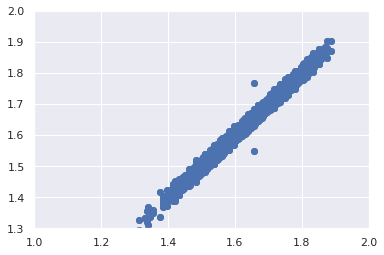

In [ ]:
plt.scatter(df['ba2'] , df['ba1'], cmap='virdis')
plt.xlim(1,2)
plt.ylim(1.3,2)
# plt.savefig("abc.pdf" , format="pdf", dpi=1000)
plt.savefig('LS.pdf', format='pdf', dpi=1000)
plt.show()
# plt.savefig("abc.pdf" , format="pdf", dpi=1000)

In [ ]:
# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# 42 is the number of elements you get in array noise

noise

In [ ]:
import numpy as np

noise = np.random.normal(0,1,42)



In [ ]:
import numpy as np
pure = df
noise = np.random.normal(0, 1, 42)
signal = pure + noise

In [ ]:
noise

array([-0.80376074,  1.25104562,  0.16784583, -1.72651299,  0.27341825,
        0.7713624 ,  0.16603446, -1.23394308, -0.30232287,  0.93723204,
        0.30204963, -1.23368067,  0.27671425,  0.82037993, -1.82311717,
        0.62157619,  1.02731773, -1.42852946,  0.0932737 ,  1.39631535,
       -1.36246754,  0.07533531,  0.59101905,  2.1668076 ,  0.63768977,
       -0.4749439 ,  0.70788243, -1.81744285, -0.35084293, -2.09163434,
       -1.43975894,  1.31833143, -1.31183758,  0.77883869,  1.13821222,
        0.73026514,  0.22999835,  1.1266365 , -1.26640795,  0.10716108,
       -0.01289146, -0.14120238])

In [ ]:
signal

,Target,Time,ba1,ba2,ba3,ba4,ba5,bd1,bd2,bd3,...,ea1,ea2,ea3,ea4,ea5,ed1,ed2,ed3,ed4,ed5
0,-0.803761,-3.748954,1.603846,-0.292513,1.714418,2.221862,1.623284,-1.229943,-0.300323,0.930232,...,-0.491838,1.613839,1.998212,1.622765,1.221248,1.126636,-1.281408,0.082161,-0.045391,-0.239952
1,-0.803761,-3.748954,1.603846,-0.292513,1.714418,2.221862,1.623284,-1.237943,-0.300323,0.930232,...,-0.491838,1.613839,1.998212,1.622765,1.221248,1.126636,-1.281408,0.082161,-0.045391,-0.239952
2,-0.803761,-3.748954,1.599846,-0.292513,1.714418,2.221862,1.623284,-1.233943,-0.304323,0.930232,...,-0.461838,1.613839,1.998212,1.622765,1.221248,1.116636,-1.251408,0.082161,-0.045391,-0.239952
3,-0.803761,-3.748954,1.599846,-0.292513,1.714418,2.221862,1.623284,-1.233943,-0.304323,0.930232,...,-0.461838,1.613839,1.998212,1.622765,1.221248,1.136636,-1.251408,0.082161,-0.045391,-0.239952
4,-0.803761,-3.748954,1.611846,-0.278513,1.714418,2.221862,1.623284,-1.245943,-0.306323,0.944232,...,-0.441838,1.663839,1.998212,1.622765,1.221248,1.116636,-1.281408,0.132161,-0.045391,-0.239952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,2.196239,-2.778954,1.575846,-0.294513,1.711418,2.208362,1.637534,-1.201943,-0.326323,0.931232,...,-0.301838,1.778839,2.120712,1.672765,1.094998,1.116636,-1.256408,0.124661,0.027109,-0.063702
3647,2.196239,-2.778954,1.575846,-0.294513,1.711418,2.208362,1.637534,-1.265943,-0.326323,0.931232,...,-0.301838,1.778839,2.120712,1.672765,1.094998,1.136636,-1.256408,0.124661,0.027109,-0.063702
3648,2.196239,-2.778954,1.563846,-0.336513,1.663418,2.161362,1.556034,-1.237943,-0.296323,0.937232,...,-0.261838,1.833839,2.193212,1.785265,1.284998,1.116636,-1.271408,0.107161,-0.012891,-0.141202
3649,2.196239,-2.778954,1.563846,-0.336513,1.663418,2.161362,1.556034,-1.229943,-0.296323,0.937232,...,-0.261838,1.833839,2.193212,1.785265,1.284998,1.136636,-1.271408,0.107161,-0.012891,-0.141202


In [ ]:
print(pure[:10])


   Target  Time    ba1    ba2    ba3     ba4      ba5           bd1    bd2  \
0       0  -5.0  1.436  1.434  1.441  1.4505  1.45725  4.000000e-03  0.002   
1       0  -5.0  1.436  1.434  1.441  1.4505  1.45725 -4.000000e-03  0.002   
2       0  -5.0  1.432  1.434  1.441  1.4505  1.45725  4.330000e-17 -0.002   
3       0  -5.0  1.432  1.434  1.441  1.4505  1.45725 -4.330000e-17 -0.002   
4       0  -5.0  1.444  1.448  1.441  1.4505  1.45725 -1.200000e-02 -0.004   
5       0  -5.0  1.444  1.448  1.441  1.4505  1.45725  1.200000e-02 -0.004   
6       0  -5.0  1.452  1.448  1.441  1.4505  1.45725 -4.000000e-03  0.004   
7       0  -5.0  1.452  1.448  1.441  1.4505  1.45725  4.000000e-03  0.004   
8       0  -5.0  1.472  1.466  1.460  1.4505  1.45725 -8.000000e-03  0.006   
9       0  -5.0  1.472  1.466  1.460  1.4505  1.45725  8.000000e-03  0.006   

     bd3  ...   ea1    ea2    ea3     ea4      ea5           ed1    ed2  \
0 -0.007  ...  0.82  0.835  0.860  0.8925  0.99125 -3.540000e-17 -

In [ ]:
print(signal[:10])

     Target      Time       ba1       ba2       ba3       ba4       ba5  \
0 -0.803761 -3.748954  1.603846 -0.292513  1.714418  2.221862  1.623284   
1 -0.803761 -3.748954  1.603846 -0.292513  1.714418  2.221862  1.623284   
2 -0.803761 -3.748954  1.599846 -0.292513  1.714418  2.221862  1.623284   
3 -0.803761 -3.748954  1.599846 -0.292513  1.714418  2.221862  1.623284   
4 -0.803761 -3.748954  1.611846 -0.278513  1.714418  2.221862  1.623284   
5 -0.803761 -3.748954  1.611846 -0.278513  1.714418  2.221862  1.623284   
6 -0.803761 -3.748954  1.619846 -0.278513  1.714418  2.221862  1.623284   
7 -0.803761 -3.748954  1.619846 -0.278513  1.714418  2.221862  1.623284   
8 -0.803761 -3.748954  1.639846 -0.260513  1.733418  2.221862  1.623284   
9 -0.803761 -3.748954  1.639846 -0.260513  1.733418  2.221862  1.623284   

        bd1       bd2       bd3  ...       ea1       ea2       ea3       ea4  \
0 -1.229943 -0.300323  0.930232  ... -0.491838  1.613839  1.998212  1.622765   
1 -1.237943 -0

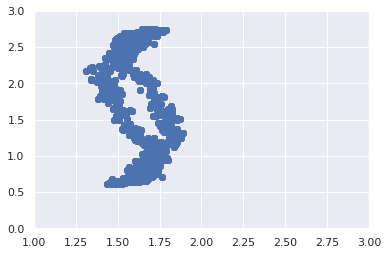

In [ ]:
plt.scatter(df['ba2'] , df['ca3'], cmap='virdis')
plt.xlim(1,3)
plt.ylim(0,3)
# plt.savefig("abc.pdf" , format="pdf", dpi=1000)
plt.savefig('Loss vs Accuracy.pdf', format='pdf', dpi=1000)
plt.show()
# plt.savefig("abc.pdf" , format="pdf", dpi=1000)

In [ ]:
kmeans = KMeans(3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:

identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

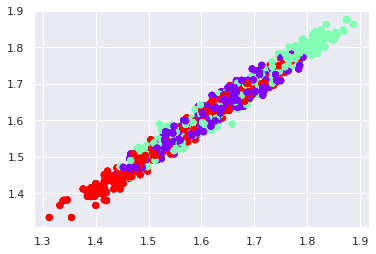

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['ba2'],data_with_clusters['ba3'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.savefig('Loss .pdf', format='pdf', dpi=1000)
plt.show()